# Sarcasm on the Internet

    People on the internet rarely read past article headlines before forming opinions and loudly complaining about them to other people. This is mostly because the titles of these articles are intended to be inflamatory and catch attention. Clickbait titles are rampant and have caused the dissemination of misinformation to occur at an astounding rate.
    
   Part of the issue lies in the linguistic aspect of headlines. While the English language, and many others, contain grammatic elements to indicate tone- a question mark for confusion, and exclamation point for excitement- there is no signal for sarcastic language. While many people can glean the meaning regardless, many others cannot. This can lead to people sharing articles or headlines that are deliberately sarcastic as fact, or forming incorrect opinions based upon satirical information. It could be helpful to have a program to detect sarcasm in a headline that people could utilize to make sure they are sharing accurate information. 
   
   The dataset I will use is the "News Headlines Dataset For Sarcasm Detection" from Kaggle (https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection). The information from the dataset comes from headlines drawn from The Onion, a satirical news site, or the HuffingtonPost, a real news site. First, I will I will read in the file, which is contained in a Json object. The information on how to do this is contained within the dataset explanation:

In [2]:
#Importing libraries and setting up the data in a dataframe
import json
import pandas as pd

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('./Sarcasm_Headlines_Dataset_v2.json'))
df = pd.DataFrame(data)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


    We can look at the dataframe and see what information the dataset has given us. There are three columns: is_sarcastic, headline, article_link. "is_sarcastic" contains a binary choice of 1 or 0. Sarcastic headlines come from The Onion and honest headlines come from the Huffington Post. It appears that the words in the headline have all been normalized to be completely lowercase, which makes our job easier. Lets inspect the data and see what further information we can uncover

In [3]:
#Inspecting the data, looking for null values
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [4]:
#Checking for duplicate values
df.duplicated().sum()

2

In [5]:
#Since there are two duplicate values, I will drop the duplicates and check again
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
#Lets see how many inputs we have for sarcastic and not sarcastic
df['is_sarcastic'].value_counts()

0    14984
1    13633
Name: is_sarcastic, dtype: int64

    We can see from here that this is a very good, complete dataset to work with. We checked for null values, made sure we had enough inputs to train and test on, and removed duplicate values. Everything is set up to be able to build the models. First, we will import all the other imports that we will be using

In [7]:
#Importing a few libraries and the classification models we will be using
import numpy as np
import matplotlib.pyplot as plt #This is for graphs and models
import seaborn as sns
%matplotlib inline

#Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#Evaluation
from sklearn import metrics

 # Training the Data
    Now that we have the imports, we need to split the data into testing and training in order to teach the model what sarcasm looks like. I am including the parameters "test_size" and "random_state"  in order to make sure that the model is not overfitting. Each time I run the cell to train the model, it will choose a different subset, ensuring that the model doesnt overlearn.
      Since we are dealing with sentances and not objective numbers, how can the program 'read' the input? In order to train a model on sentances, the words and sentances are transformed by a vectorizer. The vectorizer takes each word and assigns it a value. The more the word appears in the training set, the more weight is given to the value. This way, the model can 'read' the sentance by just counting the values of the words

In [8]:
#Now that we have the imports, we need to split our data so we can train our models. 
X = df['headline']
y = df['is_sarcastic']

#import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#We want to train the vectorizer on the headlines, which are the values in X
vectorizer.fit(X)

#Now we want to turn each value in X into a vector instead of a sentance
X = vectorizer.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=20)

# Model #1: RandomForestClassifier
A random forest classifier analyzes the data by classifying them by area, and continuing on to smaller and smaller areas until the full decision tree is created. By creating many decision tree (which make up a forest) we are able to see how exactly the program determines whether something is sarcastic or not

In [ ]:
#Creating the model and fitting it with the training data
RFmodel = RandomForestClassifier().fit(X_train, y_train)

#Print the accuracy of the model
accuracy = RFmodel.score(X_test, y_test)
print("Accuracy: ", accuracy)



# Results of Random Forest
We have an accuracy score of 81% which is very good. Our model can accurately classify a sentance as "sarcastic" or "not_sarcastic" most of the time. Lets get a but more information about how well the model is doing

 The classification report is a very handy tool since it allows us to see not only how good the model is at predicting, but also which kinds of predictions it tends to make. A model that is underfitted will allow too many false positives, while a model that is overfitted will produce too many false negatives. The classification report lets us see all the data collected. Precision is the number of accurate positive identifications from all the positive IDs. In this case, it is all of the truly sarcastic headlines from the list of sarcastic headlines identified by the model. Recall is the total number of accurately assessed sarcastic headlines out of the list of total sarcastic headlines. F1 score is a weighted average of precision and recall. 

In [10]:
#Here we are creating a classification report to determine the numbers of false positives and false negatives
y_predictions = RFmodel.predict(X_test)

print(classification_report(y_test, y_predictions, target_names=['not_sarcastic', 'sarcastic']))

               precision    recall  f1-score   support

not_sarcastic       0.84      0.79      0.81      2983
    sarcastic       0.78      0.84      0.81      2741

     accuracy                           0.81      5724
    macro avg       0.81      0.81      0.81      5724
 weighted avg       0.81      0.81      0.81      5724



   As we can see from the report, the model does very well at classifying sarcastic and non-sarcastic sentances accurately. The f1 score is also 81%, meaning that we have a fairly accurate mix of recall and precision. There aren't too many false positives or false negatives. A confusion matrix is a handy graph that demonstrates the different scores and the number of classified sentances in true-positive, true-negative, false-positive, and false-negative

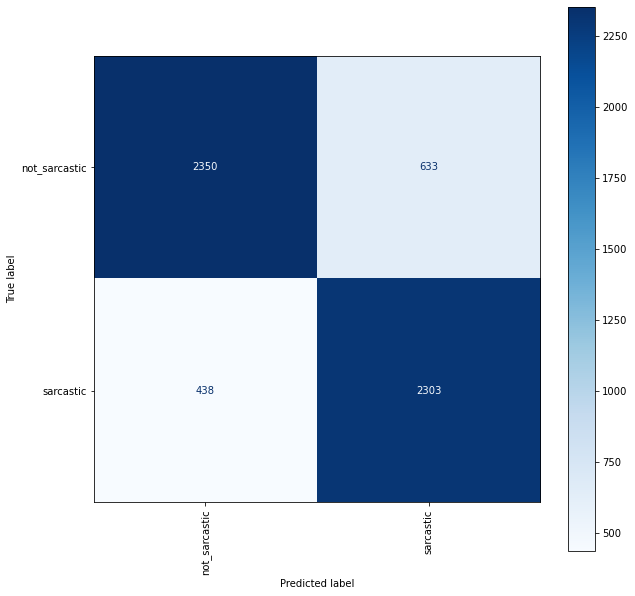

In [11]:
#plot a confusion matrix
fig, ax= plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(RFmodel, X_test, y_test,
                             display_labels=['not_sarcastic', 'sarcastic'],
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

As we can see from the graph, the darker areas have a higher concentration of correct classifications. The model accurately predicted that 2364 headlines were not sarcastic. The model also accurately predicted that 2282 headlines were sarcastic. The other two boxes help us see where the model has trouble. The model mis-classified 619 not-sarcastic sentances as sarcastic, and thought 459 sarcastic sentances were in earnest. However, since our list of data is very large, I think this is within an acceptable margin.

# Lets test out our model

In [12]:
#Test model on new headlines
sarcastic_headline = "local idiot learns that poison ivy makes for terrible toilet paper"
not_sarcastic_headline = "Sentator rescinds statement about taxes"

X = vectorizer.transform([sarcastic_headline])
predictions = RFmodel.predict(X)

#here we are getting the exact information on the percentages from the probability arrays
prediction = predictions[0]
predicted_probas = RFmodel.predict_proba(X)
predicted_proba = predicted_probas[0]


percent_not_sarcastic = predicted_proba[0]
percent_sarcastic = predicted_proba[1]

if (prediction == 1):
    prediction = "Sarcastic"

else: 
    prediction = "Not Sarcastic"

print("Model Prediction: ", prediction)
print("Not_sarcastic: ", percent_not_sarcastic)
print("Sarcastic: ", percent_sarcastic)

Model Prediction:  Sarcastic
Not_sarcastic:  0.11
Sarcastic:  0.89


Success! Our model works and can accurately detect sarcasm! Lets try some different algorithms. 

# Model #2: Logistic Regression
Logistic regression is one of the most known algorithms for classification. It uses an equation with a coefficient to map a line of demarcation between two binary values, based on many other inputs. In our case, it is going to determine some coefficient based on the words in the headline, which have been vectorized, and will then map a line dividing sentances that are sarcastic from sentances that aren't. There are many different hpyerparameters we can add to tweak our model and make sure it is the most accurate. 

In [19]:
#Creating the model and fitting it with the training data
#Dual state is false when there are more samples than features, which we have. It works with liblinear solver, and l2 penalty
#Random state helps prevent overfitting
LRmodel = LogisticRegression(dual = False, penalty = 'l2', solver = 'liblinear', random_state = 20).fit(X_train, y_train)

#Print the accuracy of the model
accuracy = LRmodel.score(X_test, y_test)
print("Accuracy: ", accuracy)



Accuracy:  0.8382250174703005


# Results
We have an accuracy score of 83% which is very good. Our model can accurately classify a sentance as "sarcastic" or "not_sarcastic" most of the time. Lets get a but more information about how well the model is doing, from a classification report. 

In [14]:
#Here we are creating a classification report to determine the numbers of false positives and false negatives
y_predictions = LRmodel.predict(X_test)
y_pred_prob = LRmodel.predict_proba(X_test)

print(classification_report(y_test, y_predictions, target_names=['not_sarcastic', 'sarcastic']))

               precision    recall  f1-score   support

not_sarcastic       0.85      0.83      0.84      2983
    sarcastic       0.82      0.84      0.83      2741

     accuracy                           0.84      5724
    macro avg       0.84      0.84      0.84      5724
 weighted avg       0.84      0.84      0.84      5724



As we can see from the report, the model does very well at classifying sarcastic and non-sarcastic sentances accurately. The F1 score is around .84 which is higher than the score for Random Forest. This model is gets less false positives and false negatives, and more accurate scores. Lets see the confusion matrix

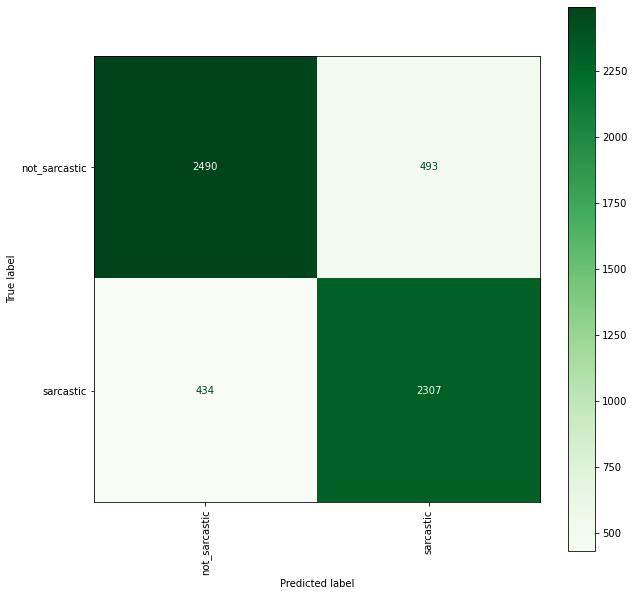

In [15]:
#plot a confusion matrix
fig, ax= plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(LRmodel, X_test, y_test,
                             display_labels=['not_sarcastic', 'sarcastic'],
                             cmap=plt.cm.Greens, ax=ax)
plt.xticks(rotation=90)
disp

This model did slightly better than the RandomForest classifier. LogisisticRegression is perfect for this sort of classification since there is a complete reliance on numbers. The sentances are vectorized into words, which make it very easy for the model to plot a coefficient. I will test the model on the same sentances as before to check. 

In [16]:
#Test model on new headlines
sarcastic_headline = "local idiot learns that poison ivy makes for terrible toilet paper"
not_sarcastic_headline = "Sentator rescinds statement about taxes"

X = vectorizer.transform([sarcastic_headline])
predictions = LRmodel.predict(X)

prediction = predictions[0]
predicted_probas = LRmodel.predict_proba(X)
predicted_proba = predicted_probas[0]
percent_not_sarcastic = predicted_proba[0]
percent_sarcastic = predicted_proba[1]

if (prediction == 1):
    prediction = "Sarcastic"

else: 
    prediction = "Not Sarcastic"
    
print("Model Prediction: ", prediction)
print("Not_sarcastic: ", percent_not_sarcastic)
print("Sarcastic: ", percent_sarcastic)

Model Prediction:  Sarcastic
Not_sarcastic:  0.20514447569234462
Sarcastic:  0.7948555243076554


This model did slightly worse on the sample headline than RandomForest did. The model was not as sure of the scores, but it did still get the correct answer. Overall it had much higher scores so I still think this one is a bit better. Lets check the 3rd and final model, LinearSVC

# Model #3: Linear SVC
LinearSVC is an algorithm that applies a vector to the plane of data, dividing it into categories. After each data point is registered, the vector is shifted slightly to accomodate it until we eventually reach the apporpriate line of demarcation. Additional parameters can be added to make sure that the line moves in smaller or biggere increments, to prevent over or underfitting. 

In [18]:
#Creating the model and fitting it with the training data
#Linear SVC does not have a predict_prob function like we have been using for the other models. 
#Instead, we can use a Calibration Classifier to get the probabilities

from sklearn.calibration import CalibratedClassifierCV

#I am assigning the boolean dual = False for the primal optimization problem
#since the number of samples is much larger than the number of features
LSVCmodel = LinearSVC(dual = False).fit(X_train, y_train)
calibration = CalibratedClassifierCV(base_estimator=LSVCmodel, cv="prefit")
calibration.fit(X_test, y_test)

#Print the accuracy of the model
accuracy = LSVCmodel.score(X_test, y_test)
print("Accuracy: ", accuracy)



Accuracy:  0.8411949685534591


# Results: 
We have an accuracy score of 84% which is very good. Our model can accurately classify a sentance as "sarcastic" or "not_sarcastic" most of the time. Lets get a but more information about how well the model is doing, from a classification report. 

In [123]:
#Here we are creating a classification report to determine the numbers of false positives and false negatives
y_predictions = LSVCmodel.predict(X_test)


print(classification_report(y_test, y_predictions, target_names=['not_sarcastic', 'sarcastic']))

               precision    recall  f1-score   support

not_sarcastic       0.85      0.85      0.85      2983
    sarcastic       0.84      0.83      0.83      2741

     accuracy                           0.84      5724
    macro avg       0.84      0.84      0.84      5724
 weighted avg       0.84      0.84      0.84      5724



As we can see from the report, the model does very well at classifying sarcastic and non-sarcastic sentances accurately. the f1 score of .85 is the highest we've gotten so far. Lets see the confusion matrix to see the accurate number of true positives and true negatives

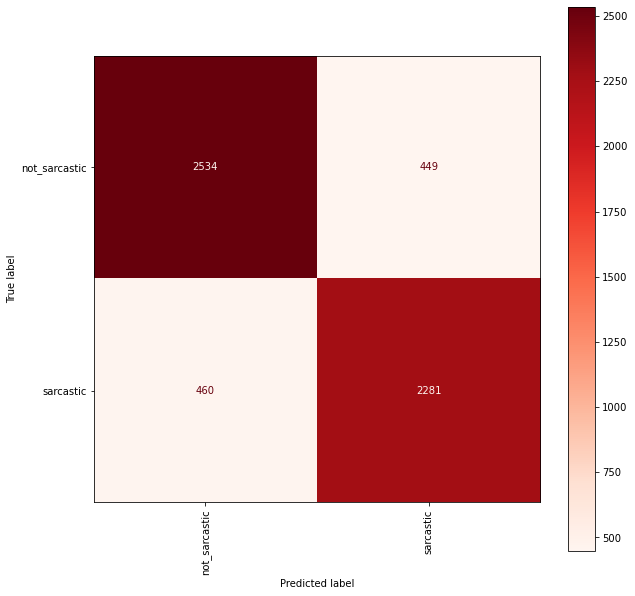

In [115]:
#plot a confusion matrix
fig, ax= plt.subplots(figsize=(10,10))
disp = plot_confusion_matrix(LSVCmodel, X_test, y_test,
                             display_labels=['not_sarcastic', 'sarcastic'],
                             cmap=plt.cm.Reds, ax=ax)
plt.xticks(rotation=90)
disp

As expected, the LinearSVC model has the best fit overall. Most of the sample is accurately predicted, except for 1000 or so answers. The model categorized 460 sarcastic sentances as earnest, and 449 sentances as sarcastic when they were in fact true. These are very good percentages, which mean that our line of division is pretty well placed. 

In [126]:
#Test model on new headlines
sarcastic_headline = "local idiot learns that poison ivy makes for terrible toilet paper"
not_sarcastic_headline = "Sentator rescinds statement about taxes"

X = vectorizer.transform([sarcastic_headline])
prediction = LSVCmodel.predict(X)

#Now we can use the calibration classifier to get the probabilities

predicted_probas = calibration.predict_proba(X)
predicted_proba = predicted_probas[0]
percent_not_sarcastic = predicted_proba[0]
percent_sarcastic = predicted_proba[1]

if (prediction == 1):
    prediction = "Sarcastic"

else: 
    prediction = "Not Sarcastic"
    
print("Model Prediction: ", prediction)
print("Not_sarcastic: ", percent_not_sarcastic)
print("Sarcastic: ", percent_sarcastic)

Model Prediction:  Sarcastic
Not_sarcastic:  0.06138166008638013
Sarcastic:  0.9386183399136199


LinearSVC acheived very good results in both the test set and the new sentance. The model correctly identified the sentance as sarcastic with a very good percentage. 

# Comparison:
It seems that LinearSVC was the best model for this task, although the margin was close. LinearSVC had the highest accuracy, followed by LogisticRegression and then lastly RandomForest. All of them were able to correctly identify the test sentance, with a high degree of accuracy. One interesting point is that although Logistic Regression had a higher accuracy rating than RandomForest, it had a lower confidence rating for the test sentance. Perhaps it needed more fitting. Overall, each of the algorithms worked very well and correctly classsified most of the sentances. For fun, feel free to play around with the input sentance and see how well the model performs. 

# Final Thoughts: 
There are so many different algorithms available for data science and machine learning, and it can be daunting to select one. While the differences here might seem trivial, for large companies dealing with terrabytes and terrabytes of data, the proper algorithm can save hours and and hours of work, and provide an extrmemely accurate result. The importance of weighing the risks of false negatives and false positives is paramount. While it might seem better intially to underfit a model, real life examples are not as forgiving as mis-labeling a joke headline as true. For a model dealing with medical diagnosis, precision and recall are the difference between life and death. A false positive can derail a person's life and cause them untold pain while a false negative can mean that no treatment is sought and the prognosis worsens. While the differences between models and parameters might seem trivial here, their usage in the real world is extrmemely important and it is critical to understand how to use them. I enjoyed comparing the different models here and seeing how different algorithms handle the same set of data. 